# Assignment 1

In [33]:
name = "Eugene Zolotarev"
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [34]:
# your code here
def my_function(first, second="default", *args, kw_first, **kwargs):
    """
    A function demonstrating different types of arguments

    Args:
        first (str): first position argument
        kw_first (str): first kw argument
        second (str, optional): second positional argument. Defaults to "default".
    """

    print(f"first = {first}, second = {second}, args = {repr(args)}, kw_first = {kw_first}, kwargs = {repr(kwargs)}")

my_function('1', '2', 3, 4, 5, kw_first='6', kw_second='7')

first = 1, second = 2, args = (3, 4, 5), kw_first = 6, kwargs = {'kw_second': '7'}


## Exercise 1


In [35]:
from math import sqrt, floor

def is_prime(n):
    """
    Check if the number is prime or not.

    Args:
        n (int): a number to test (should be > 0)
    """

    if n < 3:
        return False

    for i in range(2, floor(sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

print(repr(list((x, is_prime(x)) for x in range(1, 10))))

[(1, False), (2, False), (3, True), (4, False), (5, True), (6, False), (7, True), (8, False), (9, False)]


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [36]:
from inspect import signature, Parameter

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in)
    and print the following data:
    the name of the analyzed function,
    the name of all the arguments it takes
    and their types (positional, keyword, etc.)
    """

    print(f"name: {func.__name__}")
    for arg_name, arg_data in signature(func).parameters.items():
        kind = {
            Parameter.POSITIONAL_ONLY: 'Positional',
            Parameter.POSITIONAL_OR_KEYWORD: 'Positional/Keyword',
            Parameter.VAR_POSITIONAL: 'Positional Arbitrary',
            Parameter.KEYWORD_ONLY: 'Keyword',
            Parameter.VAR_KEYWORD: 'Keyword Arbitrary'
        }[arg_data.kind]
        print(f"{arg_name}: {kind}")

inspect_function(my_function)

name: my_function
first: Positional/Keyword
second: Positional/Keyword
args: Positional Arbitrary
kw_first: Keyword
kwargs: Keyword Arbitrary


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [37]:
from datetime import datetime
from time import sleep

# wrong function
def my_time_now(msg, *, dt=None):
    if dt is None:
        dt = datetime.now()
    print(msg, dt)


In [38]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-09 15:20:08.453224
The time is now:  2024-12-09 15:20:09.453564
The time is now:  2024-12-09 15:20:10.453900


## Exercise 4

In [23]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    for _ in range(max_count):
        yield next(input_generator)

print(list(limit((x for x in range(100)), 5)))

[0, 1, 2, 3, 4]


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [39]:
from itertools import count

def pascal_triangle_generator():
    result = [[1]]
    yield 1
    for i in count(start=1):
        row = [1]
        yield 1
        for j in range(1, i):
            n = result[i - 1][j - 1] + result[i - 1][j]
            yield n
            row.append(n)
        row.append(1)
        yield 1
        result.append(row)

print(list(limit(pascal_triangle_generator(), 55)))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5, 1, 1, 6, 15, 20, 15, 6, 1, 1, 7, 21, 35, 35, 21, 7, 1, 1, 8, 28, 56, 70, 56, 28, 8, 1, 1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


## Exercise 6


In [40]:
from pathlib import Path

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """

    def order(f):
        return [f.stat().st_size, f.name]

    result = [x for x in Path(path_to_dir).iterdir() if x.is_file()]
    result.sort(key=order)

    return result

print(repr(files_sorted_by_size('..')))

[PosixPath('../.gitignore'), PosixPath('../README.md')]


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [41]:
def merge_sorter(*generators):
    generators = [iter(x) for x in generators]
    values = [next(x, None) for x in generators]
    while True:
        m = min([x for x in values if x is not None], default=None)
        i = values.index(m)
        if m is None:
            return
        yield m
        values[i] = next(generators[i], None)

print(repr(list(merge_sorter([3, 4, 5], [7, 8, 9], [5, 6, 11], limit(pascal_triangle_generator(), 5)))))


[1, 1, 1, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 11]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [42]:
import functools
from datetime import datetime

# Using standard template, described e.g. at https://gist.github.com/jaantollander/48480cfabbe98a7efe4c9848a5b55e6a
def profiler(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
        if not hasattr(wrapper, 'calls'):
            wrapper.calls = 0

        wrapper.calls += 1

        start = datetime.now()
        result = function(*args, **kwargs)
        end = datetime.now()

        wrapper.last_time_taken = end - start

        return result
    return wrapper


@profiler
def ackermann(m, n):
    """
    Ackerman's function

    Args:
        n (int): an integer >= 0
        m (int): an integer >= 0
    """
    if m == 0:
        return n + 1
    if n == 0:
        return ackermann(m-1, 1)
    return ackermann(m-1, ackermann(m, n-1))

r = ackermann(3, 1)
print(f"A(3, 1) = {r}, time = {ackermann.last_time_taken}, calls = {ackermann.calls}")


A(3, 1) = 13, time = 0:00:00.000093, calls = 106


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [43]:
from itertools import groupby

def encode(sequence):
    """
    Performs RLE

    Args:
        sequence (list): List of chars

    Returns: list; a list where counts is interlaced 1-on-1 with chars
    """

    result = []
    for x, group in groupby(sequence):
        result.append(sum(1 for _ in group))
        result.append(x)

    return result

print(repr(encode("AAAABBBCCDAA")))

[4, 'A', 3, 'B', 2, 'C', 1, 'D', 2, 'A']


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [44]:
import functools
from graphviz import Digraph

def visualizer(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
        wrapper.__calls += 1
        dot = wrapper.__dot
        current = str(wrapper.__calls)
        dot.node(current, label=repr(args))

        old_current = wrapper.__current
        wrapper.__current = current
        if old_current is not None:
            dot.edge(current, old_current)

        result = function(*args, **kwargs)

        wrapper.__current = old_current
        return result
    wrapper.__dot = Digraph()
    wrapper.__calls = 0
    wrapper.__current = None
    return wrapper

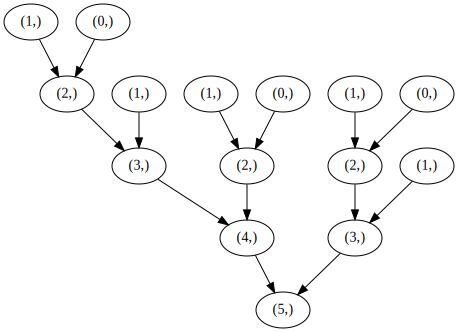

In [46]:
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

fibonacci(5)
fibonacci.__dot

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [47]:
import functools

def memoizer(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
        cached = wrapper.__cache.get(args, None)
        if cached is not None:
            return cached

        result = function(*args, **kwargs)

        wrapper.__cache[args] = result
        return result
    wrapper.__cache = {}
    return wrapper

decorated_fib(5) = 5, time = 0:00:00.000111, calls = 9


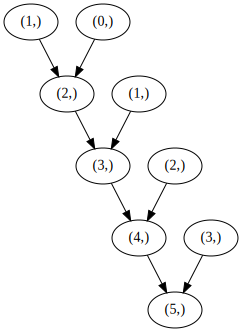

In [49]:
@profiler
@visualizer
@memoizer
def decorated_fib(n):
    if n == 0 or n == 1:
        return n
    return decorated_fib(n-1) + decorated_fib(n-2)

r = decorated_fib(5)
print(f"decorated_fib(5) = {r}, time = {decorated_fib.last_time_taken}, calls = {decorated_fib.calls}")
decorated_fib.__dot

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [60]:
from IPython.display import HTML, display
from html import escape

list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += f"<td><h4>{escape(field)}</h4></td>"
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

data = [['', *[repr(x) for x in list_of_types]]]
for o in list_of_objects:
    data.append([repr(o)])
    for t in list_of_types:
        data[-1].append(str(isinstance(o, t)))

display_table(data)

,<class 'int'>,<class 'float'>,<class 'object'>,<class 'str'>,<class 'dict'>,<class 'list'>
<class 'int'>,False,False,True,False,False,False
2,True,False,True,False,False,False
2.0,False,True,True,False,False,False
None,False,False,True,False,False,False
<class 'object'>,False,False,True,False,False,False
<class 'str'>,False,False,True,False,False,False
'2.0',False,False,True,True,False,False
2.0,False,True,True,False,False,False
'hello',False,False,True,True,False,False
<class 'dict'>,False,False,True,False,False,False
